In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

mobileNetV2 = load_model('/content/drive/MyDrive/models/first_model.h5')
efficientNet = load_model('/content/drive/MyDrive/models/second_model.h5')

In [ ]:
# set the env var for the json file path
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets list -s 'SARS-COV-2 Ct-Scan Dataset'

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
plameneduardo/sarscov2-ctscan-dataset                   SARS-COV-2 Ct-Scan Dataset                        230MB  2020-05-30 12:48:27           6481  
plameneduardo/a-covid-multiclass-dataset-of-ct-scans    A COVID multiclass dataset of CT scans            405MB  2020-06-11 08:12:39            297  
azaemon/preprocessed-ct-scans-for-covid19               CT Scans for COVID-19 Classification                4GB  2020-08-11 19:36:14           1262  
mehradaria/covid19-lung-ct-scans                        COVID-19 Lung CT Scans                              1GB  2021-01-24 21:41:47            190  
mloey1/covid19-chest-ct-image-augmentation-gan-dataset  COVID-19 Chest CT image Augmentation GAN Dat

In [ ]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 97% 223M/230M [00:01<00:00, 146MB/s]
100% 230M/230M [00:01<00:00, 121MB/s]


In [ ]:
!unzip -q sarscov2-ctscan-dataset.zip

In [ ]:
import cv2
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from tensorflow.keras import *
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import itertools
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
folders = ['COVID','non-COVID']
base_folder = '/content'
data = []
labels = []

for folder in folders :
  files = os.listdir(os.path.join(base_folder, folder))
  for file in files:
    img = cv2.imread(os.path.join(base_folder, folder, file),0)
    img = cv2.resize(img, (112, 112))
    data.append(img)
    labels.append(folder)

In [ ]:
data = data.reshape(-1, 112, 112, 1)

In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(2481, 112, 112, 1)
(2481,)


In [ ]:
data = data / 255.

In [ ]:
encode = LabelEncoder()
onehotencoder = OneHotEncoder()

labels = encode.fit_transform(labels)
encode_labels = labels.reshape(-1,1)
print(encode_labels)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
prediction = mobileNetV2.predict(data)

In [ ]:
mobileNet_predictions = backend.argmax(prediction).numpy()

In [ ]:
mobileNet_predictions[mobileNet_predictions > 0] = 1

In [ ]:
mobileNet_predictions.max()

1

In [ ]:
def print_res(classes, predictions, labels):
  print(classification_report(labels,predictions))
  cm = confusion_matrix(labels,predictions)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.54      0.81      0.65      1252
           1       0.61      0.31      0.41      1229

    accuracy                           0.56      2481
   macro avg       0.58      0.56      0.53      2481
weighted avg       0.58      0.56      0.53      2481



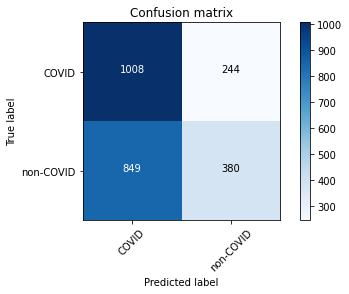

In [ ]:
classes = ['COVID','non-COVID']

print_res(classes, mobileNet_predictions, encode_labels)

In [ ]:
prediction = efficientNet.predict(data)

In [ ]:
efficientNet_predictions = backend.argmax(prediction).numpy()

In [ ]:
efficientNet_predictions[efficientNet_predictions > 0] = 1

In [ ]:
efficientNet_predictions.max()

0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1252
           1       0.00      0.00      0.00      1229

    accuracy                           0.50      2481
   macro avg       0.25      0.50      0.34      2481
weighted avg       0.25      0.50      0.34      2481



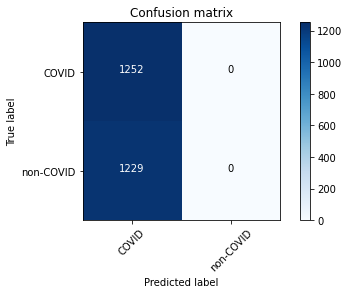

In [ ]:
print_res(classes, efficientNet_predictions, encode_labels)

In [ ]:
import zipfile
import os

In [ ]:
!wget --no-check-certificate \
    "https://github.com/abzargar/COVID-Classifier/archive/refs/heads/master.zip"

!unzip -q master.zip

--2021-10-06 07:45:23--  https://github.com/abzargar/COVID-Classifier/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/abzargar/COVID-Classifier/zip/refs/heads/master [following]
--2021-10-06 07:45:24--  https://codeload.github.com/abzargar/COVID-Classifier/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.1’

master.zip.1            [         <=>        ] 129.03M  25.5MB/s    in 5.4s    

2021-10-06 07:45:29 (23.8 MB/s) - ‘master.zip.1’ saved [135300788]



In [ ]:
folders = ['covid','normal', 'pneumonia']
base_folder = '/content/COVID-Classifier-master/dataset/original_images'
data = []
labels = []

for folder in folders :
  files = os.listdir(os.path.join(base_folder, folder))
  for file in files:
    img = cv2.imread(os.path.join(base_folder, folder, file),0)
    try:
      img = cv2.resize(img, (112, 112))
    except:
      continue
    data.append(img)
    labels.append(folder)

In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(380, 112, 112)
(380,)


In [ ]:
data = data.reshape(-1, 112, 112, 1)

In [ ]:
data = data/255.

In [ ]:
encode = LabelEncoder()
onehotencoder = OneHotEncoder()

labels = encode.fit_transform(labels)
encode_labels = labels.reshape(-1,1)

encode_labels[encode_labels == 2] = 3
encode_labels[encode_labels == 1] = 2


In [ ]:
print(encode_labels)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]


In [ ]:
prediction = mobileNetV2.predict(data)

In [ ]:
mobileNet_predictions = backend.argmax(prediction).numpy()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.68      0.75       140
           1       0.00      0.00      0.00         0
           2       0.88      0.63      0.73       100
           3       0.87      0.93      0.90       140

    accuracy                           0.76       380
   macro avg       0.65      0.56      0.60       380
weighted avg       0.86      0.76      0.80       380



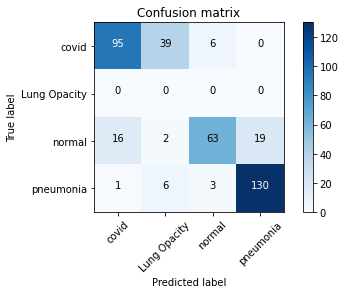

In [ ]:
classes = ['covid','Lung Opacity','normal', 'pneumonia']

print_res(classes, mobileNet_predictions, encode_labels)

In [ ]:
prediction = efficientNet.predict(data)

In [ ]:
efficientNet_predictions = backend.argmax(prediction).numpy()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.37      1.00      0.54       140
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       140

    accuracy                           0.37       380
   macro avg       0.12      0.33      0.18       380
weighted avg       0.14      0.37      0.20       380



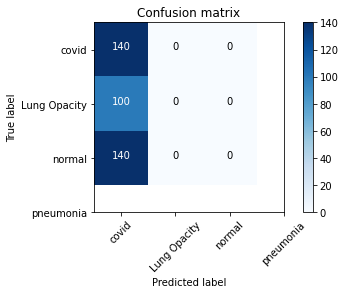

In [ ]:
classes = ['covid','Lung Opacity','normal', 'pneumonia']

print_res(classes, efficientNet_predictions, encode_labels)

In [ ]:
!kaggle datasets list -s 'COVID CXR Image Dataset (Research)'

ref                                                            title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
sid321axn/covid-cxr-image-dataset-research                     COVID CXR Image Dataset (Research)                 572MB  2021-07-19 04:49:03            199  
tawsifurrahman/covid19-radiography-database                    COVID-19 Radiography Database                      745MB  2021-03-06 18:17:46          32912  
andyczhao/covidx-cxr2                                          COVIDx CXR-2                                        12GB  2021-05-31 13:40:19           1709  
preetviradiya/covid19-radiography-dataset                      COVID-19 Radiography Dataset                       747MB  2021-05-22 05:04:10           1027  
hgunraj/covidxct                                    

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 99% 569M/572M [00:06<00:00, 101MB/s]
100% 572M/572M [00:06<00:00, 89.8MB/s]


In [ ]:
!unzip -q covid-cxr-image-dataset-research.zip

In [ ]:
folders = ['covid','normal', 'virus']
base_folder = '/content/COVID_IEEE'
data = []
labels = []

for folder in folders :
  files = os.listdir(os.path.join(base_folder, folder))
  for file in files:
    img = cv2.imread(os.path.join(base_folder, folder, file),0)
    img = cv2.resize(img, (112, 112))
    data.append(img)
    labels.append(folder)

In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(1823, 112, 112)
(1823,)


In [ ]:
data = data.reshape(-1, 112, 112, 1)

In [ ]:
data = data / 255.

In [ ]:
encode = LabelEncoder()
onehotencoder = OneHotEncoder()

labels = encode.fit_transform(labels)
encode_labels = labels.reshape(-1,1)

encode_labels[encode_labels == 2] = 3
encode_labels[encode_labels == 1] = 2
encode_labels[encode_labels == 3] = 1

In [ ]:
encode_labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
prediction = mobileNetV2.predict(data)

In [ ]:
mobileNet_predictions = backend.argmax(prediction).numpy()

In [ ]:
mobileNet_predictions[mobileNet_predictions == 3] = 1

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       536
           1       0.70      0.99      0.82       619
           2       0.95      0.79      0.87       668

    accuracy                           0.82      1823
   macro avg       0.86      0.82      0.82      1823
weighted avg       0.86      0.82      0.82      1823



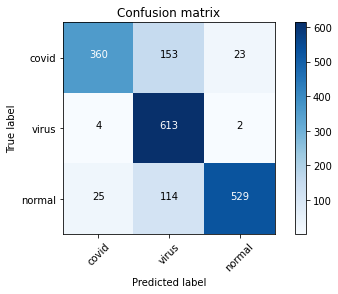

In [ ]:
classes = ['covid','virus','normal']

print_res(classes, mobileNet_predictions, encode_labels)

In [ ]:
prediction = efficientNet.predict(data)

In [ ]:
efficientNet_predictions = backend.argmax(prediction).numpy()

In [ ]:
efficientNet_predictions[efficientNet_predictions == 3] = 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.29      1.00      0.45       536
           1       0.00      0.00      0.00       619
           2       0.00      0.00      0.00       668

    accuracy                           0.29      1823
   macro avg       0.10      0.33      0.15      1823
weighted avg       0.09      0.29      0.13      1823



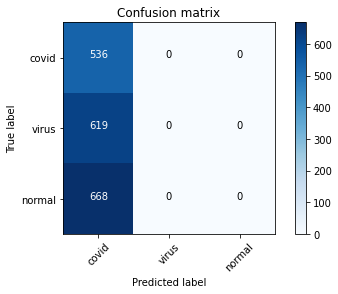

In [ ]:
classes = ['covid','virus','normal']

print_res(classes, efficientNet_predictions, encode_labels)